In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
# params
SAVEDIR = 'plots/'
FS = 10
N_SAMPLES = 1e5

# P1

## Time domain

In [2]:
data_time = pd.read_csv("results/P1_time_results.csv")
data_time.drop(columns=["Unnamed: 8"], inplace=True)
# Get data titles as a list
titles = data_time.columns.tolist()
# Separate by alpha
alpha022 = [title for title in titles if "0.22" in title]
alpha050 = [title for title in titles if "0.50" in title]

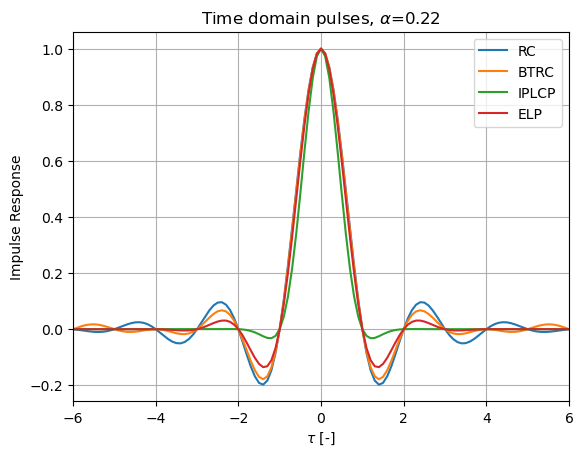

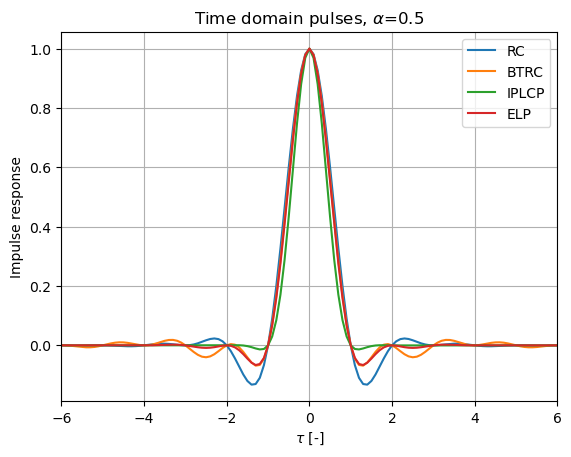

In [3]:
# Create a figure with 2x2 subplots
fig1, axs1 = plt.subplots(1)
fig2, axs2 = plt.subplots(1)
# Add titles
axs1.set_title("Time domain pulses, " + r"$\alpha$=0.22")
axs1.set_xlabel(r"$\tau$ [-]")
axs1.set_ylabel("Impulse Response")
axs1.set_xlim(-6, 6)
axs1.grid()
#
axs2.set_title("Time domain pulses, " + r"$\alpha$=0.5")
axs2.set_xlabel(r"$\tau$ [-]")
axs2.set_ylabel("Impulse response")
axs2.set_xlim(-6, 6)
axs2.grid()
# Time domain plots
# Create x axis
lenx = len(data_time.index) - 1
data_time["time"] = np.linspace(-lenx/(2 *FS), lenx/(2 *FS), lenx + 1)
for i in range(len(alpha022)):
    # 0.22
    pulse = alpha022[i]
    # Get the pulse name
    pulse_name = re.split("_", pulse)
    axs1.plot(data_time["time"], data_time[pulse], label=pulse_name[0])
    # 0.50
    pulse = alpha050[i]
    pulse_name = re.split("_", pulse)
    axs2.plot(data_time["time"], data_time[pulse], label=pulse_name[0])
# Add legend
axs2.legend()
axs1.legend()
# Save the plots
fig2.savefig(SAVEDIR + "time_domain_050.pdf")
fig1.savefig(SAVEDIR + "time_domain_022.pdf")


## Frequency domain

In [4]:
data_freq = pd.read_csv("results/P1_freq_results.csv")
data_freq.drop(columns=["Unnamed: 8"], inplace=True)
# Get data titles as a list
titles = data_freq.columns.tolist()
# Separate by alpha
alpha022 = [title for title in titles if "0.22" in title]
alpha050 = [title for title in titles if "0.50" in title]

16384


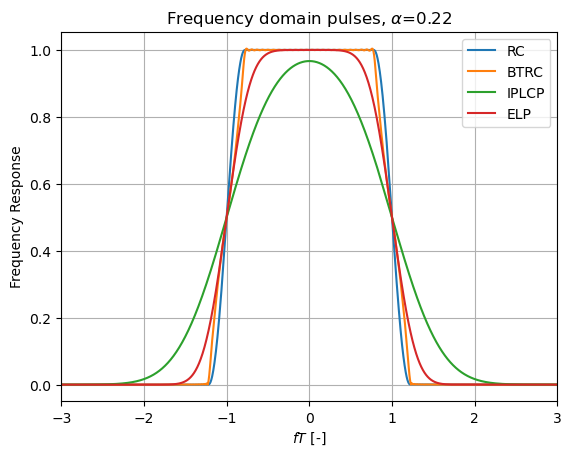

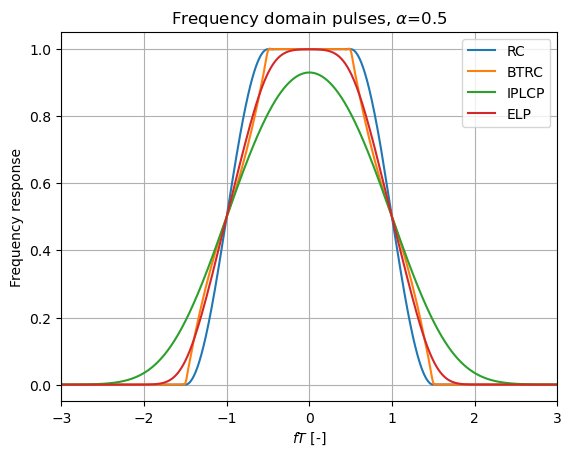

In [5]:
# Create a figure with 2x2 subplots
fig1, axs1 = plt.subplots(1)
fig2, axs2 = plt.subplots(1)
# Add titles
axs1.set_title("Frequency domain pulses, " + r"$\alpha$=0.22")
axs1.set_xlabel(r"$fT$ [-]")
axs1.set_ylabel("Frequency Response")
axs1.set_xlim(-3, 3)
axs1.grid()
#
axs2.set_title("Frequency domain pulses, " + r"$\alpha$=0.5")
axs2.set_xlabel(r"$fT$ [-]")
axs2.set_ylabel("Frequency response")
axs2.set_xlim(-3, 3)
axs2.grid()
# Freq domain plots
# Create x axis
lenxf = len(data_freq.index)
print(lenxf)
interval = (-lenx/(2 *FS) - lenx/(2 *FS)) / lenx
# Calculate the new min and max based on the new length
new_min = -lenx/(2 *FS) - (interval * (lenx / lenxf))
new_max = lenx/(2 *FS) + (interval * (lenx / lenxf))
# Generate the new array with 1024 values
new_data_freq = np.linspace(new_min, new_max, lenxf)
data_freq["freq"] = new_data_freq/(new_data_freq[-1] * interval)

for i in range(len(alpha022)):
    # 0.22
    pulse = alpha022[i]
    # Get the pulse name
    pulse_name = re.split("_", pulse)
    axs1.plot(data_freq["freq"], data_freq[pulse], label=pulse_name[0])
    # 0.50
    pulse = alpha050[i]
    pulse_name = re.split("_", pulse)
    axs2.plot(data_freq["freq"], data_freq[pulse], label=pulse_name[0])
# Add legend
axs2.legend()
axs1.legend()
# Save the plots
fig2.savefig(SAVEDIR + "freq_domain_050.pdf")
fig1.savefig(SAVEDIR + "freq_domain_022.pdf")

# P2

In [6]:
data_eye = pd.read_csv("results/P2_results.csv")
data_eye.drop(columns=["Unnamed: 4"], inplace=True)
data_eye.tail()
# # Get data titles as a list
# titles = data_time.columns.tolist()

,RC_alpha_0.220000,BTRC_alpha_0.220000,IPLCP_alpha_0.220000,ELP_alpha_0.220000
1000595,0.0,0.0,0.0,0.0
1000596,0.0,0.0,0.0,0.0
1000597,0.0,0.0,0.0,0.0
1000598,0.0,0.0,0.0,0.0
1000599,0.0,0.0,0.0,0.0


1000000
Max distortion: 2.00631


 ...]

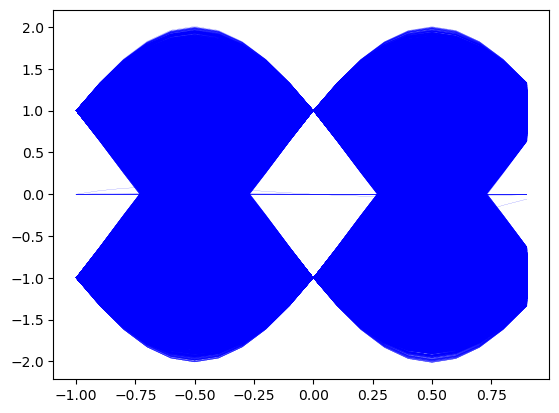

In [14]:
data_eye_RC = data_eye["RC_alpha_0.220000"]
# For some reason, the first 600 values are 0 , remove them
data_e = data_eye_RC[6*FS*FS:].to_numpy()
print(len(data_e))
print(f"Max distortion: {data_e.max()}")
x = np.linspace(-1, 0.9, 2*FS)


data_e_reshape = data_e.reshape((int(len(data_e)/(2*FS)) , 2*FS))
plt.plot(x, data_e_reshape.T, linewidth=.1, color='blue')